In [1]:
import pandas as pd
import numpy as np
from lets_plot import *


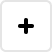
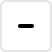
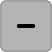
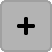
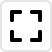
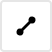
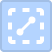
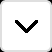
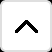
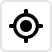
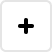
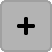
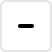
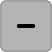
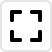
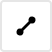
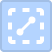
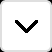
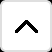
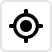

In [2]:
def dump_plot(plot, display=None):
    import json

    try:
        import clipboard
    except:
        print("clipboard = None")
        clipboard = None
        
    from lets_plot._type_utils import standardize_dict
    
    plot_dict = standardize_dict(plot.as_dict())
    plot_json = json.dumps(plot_dict, indent=2)
    
    if clipboard:
        clipboard.copy('')
        clipboard.copy(str(plot_json))
    else:
        if display is None:
            display = True
    
    if display:
        print(plot_json)

    return plot

LetsPlot.setup_html()

### Integer Column Key

In [3]:
df = pd.DataFrame(np.random.rand(100, 2))
#df.columns = df.columns.astype(str)

In [4]:
ggplot(df) + geom_point(aes(x="0", y="1"))

In [5]:
dft = pd.DataFrame(
    {
        0: ["a","b", "c"],
        1: ["d", "e", "g"]
    }
)
dft
#print(dft[1])

0  1
0  a  d
1  b  e
2  c  g

In [6]:
ggplot(dft) + geom_point(aes(x="0", y="1"))

### String Column Key

In [7]:
dft = pd.DataFrame(
    {
        "0": ["a","b", "c"],
       "d1": ["d", "e", "g"]
    }
)
dft
#print(dft[0])

0 d1
0  a  d
1  b  e
2  c  g

In [8]:
ggplot(dft) + geom_point(aes(x="0", y="d1"))

### MultiIndex

In [9]:
df = pd.DataFrame(np.random.random((4,4)))
df.columns = pd.MultiIndex.from_product([[1,2],['A','B']])
print(df)

          1                   2          
          A         B         A         B
0  0.548489  0.698455  0.891631  0.286938
1  0.646660  0.718617  0.733705  0.787220
2  0.477125  0.086755  0.693853  0.458766
3  0.567006  0.766847  0.653395  0.794690


In [10]:
idx = df.index
df.index = df.index.set_levels(idx.levels[-1].astype(str), level=-1)

AttributeError: 'RangeIndex' object has no attribute 'set_levels'

In [ ]:
df.columns = pd.MultiIndex.from_frame(
        pd.DataFrame(index=df.columns)
        .reset_index().astype(str)
        )
print(df)

In [ ]:
from lets_plot import *
ggplot(df) + geom_point(aes(x="[1, A]", y="[2, A]"))

In [ ]:
df.columns = df.columns.astype(str)
df

In [ ]:
import pandas as pd
import numpy as np

d = {
    ('simple', 'int'): [1, 2, 3, 4],
    ('simple', 'float'): [0.1, 0.2, 0.3, 0.4],
    ('simple', 'str'): ['one', 'two', 'three', 'four'],
    ('complex', 'obj'): [
        {'k1': 1},
        {'k2': 2},
        {'k3': 3},
        {'k3': 4}
    ],
    ('complex', 'arr_num_sym'): [
        [1.1, 1.2],
        [2.1, 2.2],
        [3.1, 3.2],
        [4.1, 4.2]
    ],
    ('complex', 'arr_obj_asym'): [
        [
            {'1k1': 1.1},
        ],
        [
            {'2k1': 2.1},
            {'2k2': 2.3}
        ],
        [],
        []
    ],
    ('complex', 'mixed'): [
        None,
        False,
        'string',
        [
            None,
            # bools
            True,
            False,
            # strings
            'string',
            '',
            # numbers
            42.7,
            np.NaN,
            # times
            np.datetime64('2021-08-05T18:23:49.705115547+02:00'),
            np.datetime64('NaT'),
            np.timedelta64(1, 'h'),
            np.timedelta64('NaT'),
            # nested objects
            {'k2': 2.1},
            # sequences
            [
                {'n3k1': 3.1},
                {'n3k2': 3.2},
            ],
            # empty sequences
            [],
            [[], []]
        ]
    ],
    ('nothing', 'nan'): [np.NaN, np.NaN, np.NaN, np.NaN],
    ('nothing', 'nat'): [np.datetime64('NaT') for i in range(4)],
    ('nothing', 'null'): [None, None, None, None],
    ('nothing', 'empty_str'): ['', '', '', ''],
    ('nothing', 'empty_arr'): [[], [], [], []],
    ('nothing', 'mixed'): [np.NaN, None, '', []],
}
df = pd.DataFrame(d)
print(df)